In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
car=pd.read_csv("CarPrice_Assignment.csv")

## Step 1: Reading and Understanding the Data


In [2]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car.shape

(205, 26)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


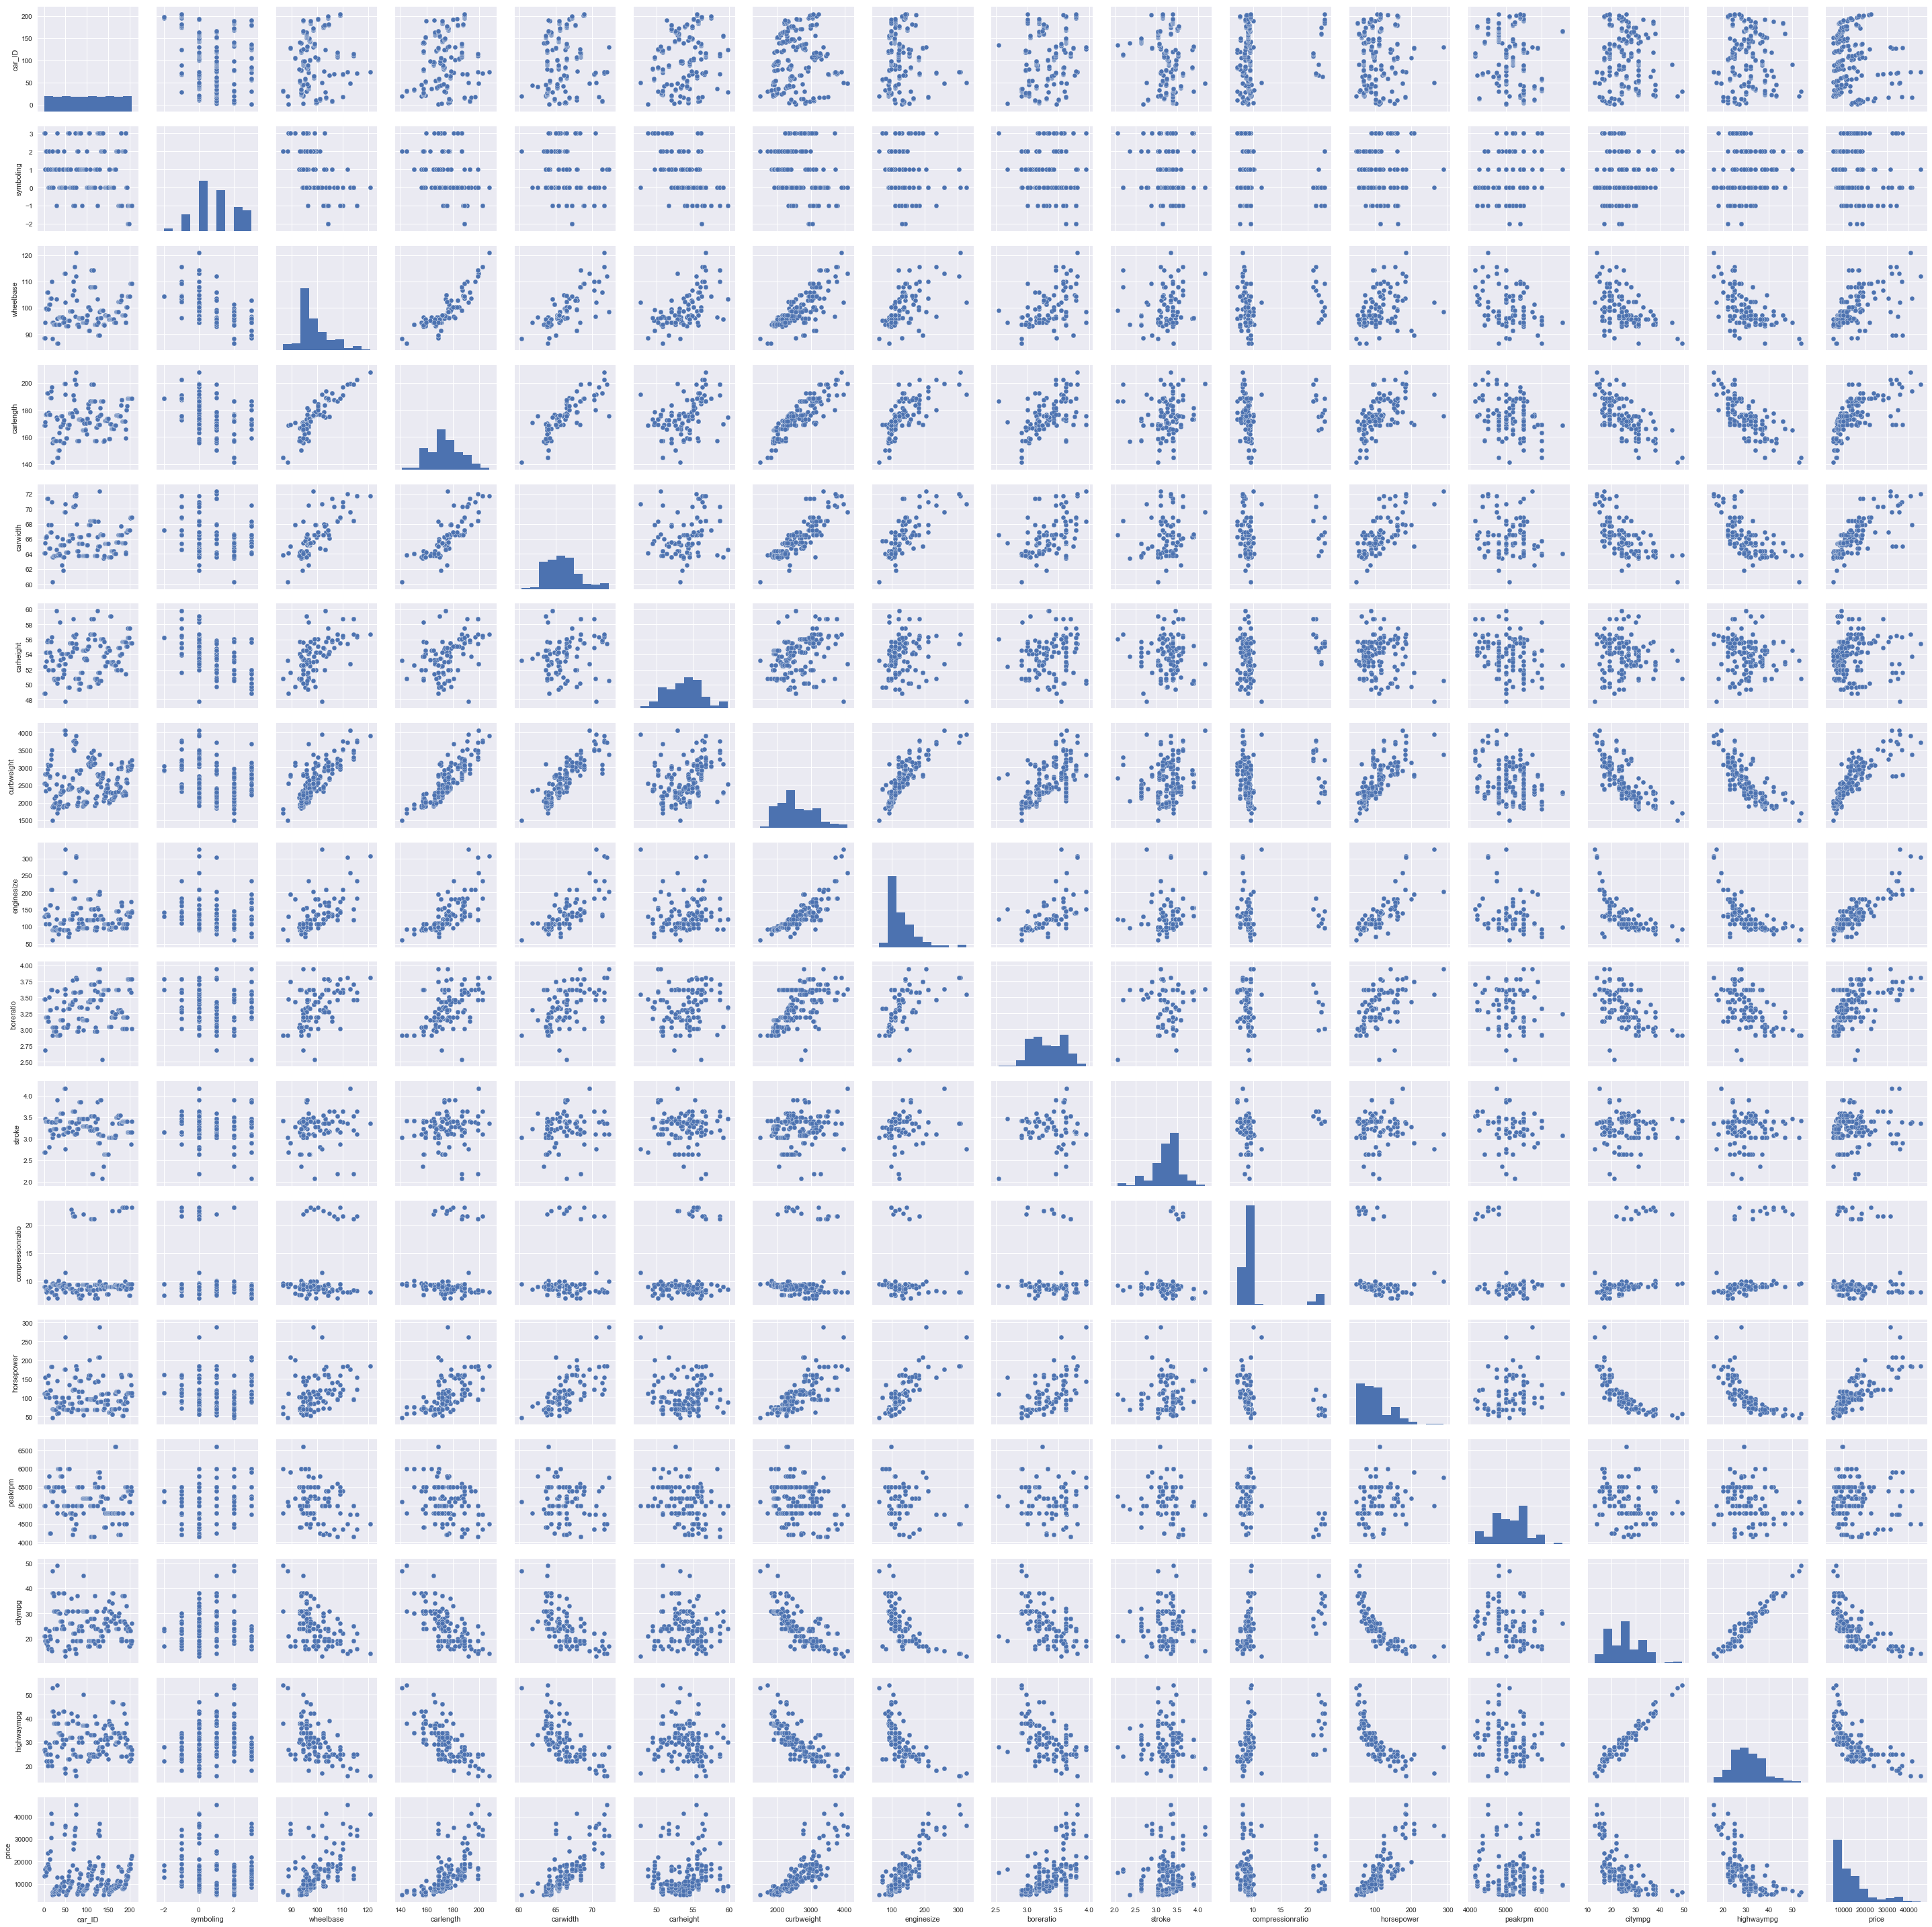

In [6]:
#Visualizing the data
sns.pairplot(car)
plt.show()

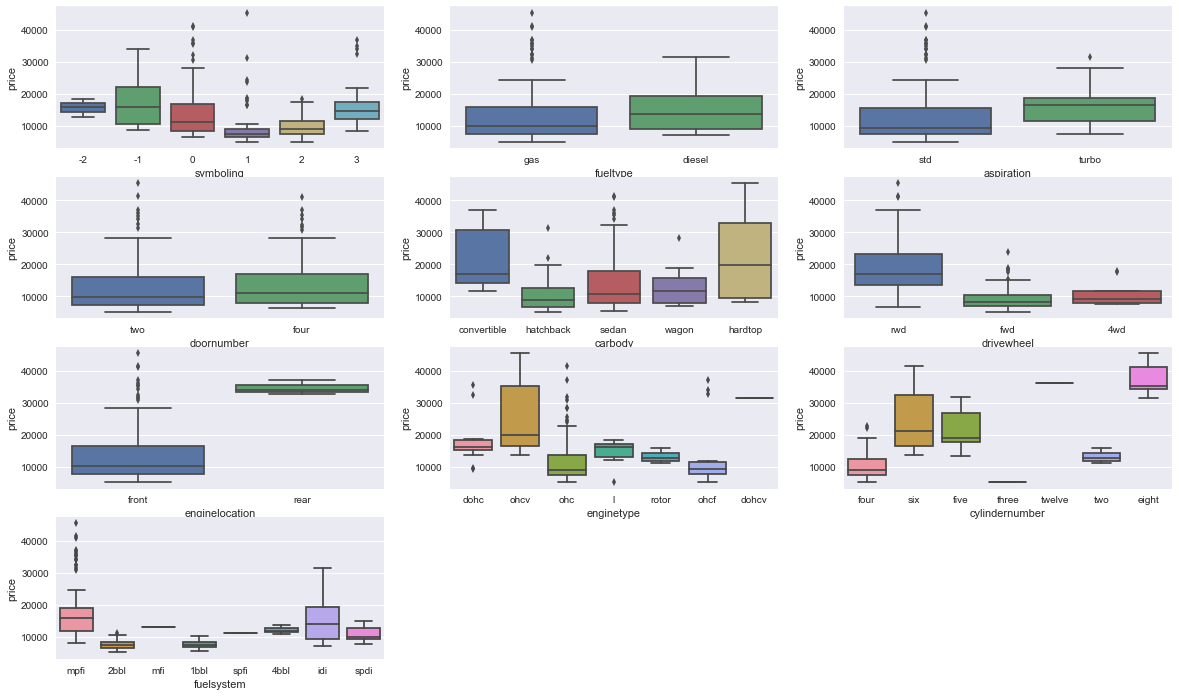

In [7]:
#create subplots
plt.figure(figsize=(20,12))
plt.subplot(4,3,1)
#2 rows, 3 columns, this is the 1st one
sns.boxplot(x='symboling',y='price', data=car)

plt.subplot(4,3,2)
#2 rows, 3 columns, this is the 2nd one
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()


### DATA PREPARATION

In [8]:
#Using company name to sort out the cars
company = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"company",company)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
#Correct the names of the company
car=car.replace(to_replace="maxda", value="mazda")
car=car.replace(to_replace="Nissan", value="nissan")
car=car.replace(to_replace="porcshce", value="porsche")
car=car.replace(to_replace="toyouta", value="toyota")
car=car.replace(to_replace="vokswagen", value="volkswagen")
car=car.replace(to_replace="vw", value="volkswagen")
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
car.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### DUMMY VARIABLES

In [12]:
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})

In [515]:
car_new = pd.get_dummies(car,drop_first= True)
car_new.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [516]:
car_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
car_ID                   205 non-null int64
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64

In [517]:
#sns.pairplot(car_new)
#plt.show()

## Step 2: Preparing the data for modelling (train-test split, rescaling etc.)


### Splitting the Data into Training and Testing Sets

In [518]:
from sklearn.model_selection import train_test_split

car_train, car_test = train_test_split(car_new, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [519]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [520]:
print(car_train.shape)
print(car_test.shape)

(143, 66)
(62, 66)


In [521]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

car_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.6,1.0,1.0,0.0,1.0,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,1.0,1.0,1.0,1.0,1.0,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,0.6,1.0,1.0,1.0,1.0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1.0,1.0,1.0,1.0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,0.2,1.0,0.0,0.0,1.0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


## Step 3: Training the model- (learn the coefficient and intercept)

#### Dividing into X and Y sets for the model building

In [522]:
y_train = car_train.pop('price')
X_train = car_train

In [523]:
X_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.6,1.0,1.0,0.0,1.0,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,1.0,1.0,1.0,1.0,1.0,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,0.6,1.0,1.0,1.0,1.0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1.0,1.0,1.0,1.0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,0.2,1.0,0.0,0.0,1.0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


## Building our model using RFE

In [524]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
#pass the model instance (lm) to RFE. RFE needs the model itself and the number of vars you want to choose
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [525]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 51),
 ('symboling', False, 52),
 ('fueltype', False, 24),
 ('aspiration', False, 14),
 ('doornumber', False, 47),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('company_audi', False, 37),
 ('company_bmw', True, 1),
 ('company_buick', False, 38),
 ('company_chevrolet', False, 23),
 ('company_dodge', False, 20),
 ('company_honda', False, 22),
 ('company_isuzu', False, 48),
 ('company_jaguar', False, 28),
 ('company_mazda', False, 43),
 ('company_mercury', False, 54),
 ('company_mitsubishi', False, 13),
 ('company_nissan', False, 42),
 ('company_peugeot', False, 6),
 ('company_plymouth', False, 19),
 ('company_porsche', True, 1),
 ('company_rena

In [526]:
#take the top 10
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'company_bmw', 'company_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [527]:
#show the remaining columns not being selected/not useful
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'company_audi',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsys

### Building model using statsmodel, for the detailed statistics


In [528]:
# Creating X_test dataframe with RFE selected variables . the 10 cols
X_train_rfe = X_train[col]

In [529]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [530]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [531]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.21e-64
Time:                        22:55:03   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [532]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [533]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,44.03
1,carwidth,34.95
3,enginesize,24.23
4,boreratio,12.56
0,enginelocation,11.11
8,cylindernumber_twelve,1.49
6,company_porsche,1.40
9,cylindernumber_two,1.26
5,company_bmw,1.18
7,cylindernumber_three,1.06


In [534]:
#cylindernumber_twelve has highest P and a low VIF (< 5) so we remove it first. here it is cylindernumber_twelve
X=X_train_rfe.drop('curbweight',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.17e-63
Time:                        22:55:03   Log-Likelihood:                 183.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     133   BIC:                            -317.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [535]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_new=X_train_new.drop('curbweight',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.94
2,enginesize,13.71
3,boreratio,11.71
0,enginelocation,10.35
7,cylindernumber_twelve,1.39
5,company_porsche,1.24
8,cylindernumber_two,1.20
4,company_bmw,1.18
6,cylindernumber_three,1.06


In [536]:
#Remove Low p, High VIF : Curb Weight
X=X.drop('cylindernumber_twelve',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.01e-63
Time:                        22:55:03   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1849 

In [537]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_new=X_new.drop('cylindernumber_twelve',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,21.72
3,boreratio,11.49
0,enginelocation,10.35
2,enginesize,10.35
5,company_porsche,1.24
7,cylindernumber_two,1.16
4,company_bmw,1.14
6,cylindernumber_three,1.06


In [538]:
#removing boreratio as High VIF High P value
X=X.drop('boreratio',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.04e-64
Time:                        22:55:03   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1702 

In [539]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_new=X_new.drop('boreratio',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,20.30
2,enginesize,9.94
0,enginelocation,8.35
6,cylindernumber_two,1.15
3,company_bmw,1.14
4,company_porsche,1.12
5,cylindernumber_three,1.06


In [540]:
X=X.drop('company_porsche',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.62e-64
Time:                        22:55:03   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2478 

In [541]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_new=X_new.drop('company_porsche',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,20.01
2,enginesize,9.86
0,enginelocation,7.95
5,cylindernumber_two,1.15
3,company_bmw,1.13
4,cylindernumber_three,1.06


## Step 4: Residual Analysis


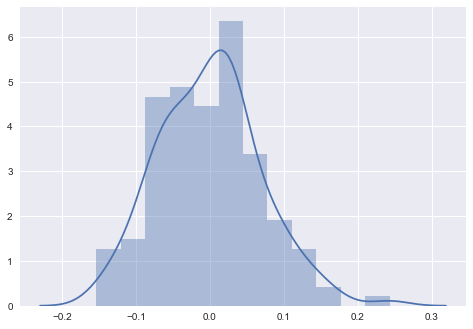

In [542]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred

sns.distplot(res)
plt.show()

## Step 5: Predictions and evaluation on the test set


In [543]:
num_vars=['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
car_test[num_vars]=scaler.transform(car_test[num_vars])
car_test.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,161,0.4,1.0,1.0,0.0,1.0,0.313793,0.409756,0.341667,0.460177,...,0,0,0,1,0,0,0,0,0,0
186,187,0.8,1.0,1.0,0.0,1.0,0.368966,0.497561,0.433333,0.699115,...,0,0,0,0,0,0,0,1,0,0
59,60,0.6,1.0,1.0,1.0,1.0,0.420690,0.596748,0.516667,0.522124,...,0,0,0,1,0,0,0,0,0,0
165,166,0.6,1.0,1.0,1.0,1.0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
140,141,0.8,1.0,1.0,1.0,1.0,0.231034,0.263415,0.291667,0.699115,...,0,0,0,1,0,0,0,0,0,0


In [544]:
car_test.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,113.322581,0.583871,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,59.300782,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.400000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.500000,0.600000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,167.500000,0.800000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [545]:
y_test=car_test.pop('price')
X_test=car_test

In [546]:
#add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,1.0,161,0.4,1.0,1.0,0.0,1.0,0.313793,0.409756,0.341667,...,0,0,0,1,0,0,0,0,0,0
186,1.0,187,0.8,1.0,1.0,0.0,1.0,0.368966,0.497561,0.433333,...,0,0,0,0,0,0,0,1,0,0
59,1.0,60,0.6,1.0,1.0,1.0,1.0,0.420690,0.596748,0.516667,...,0,0,0,1,0,0,0,0,0,0
165,1.0,166,0.6,1.0,1.0,1.0,1.0,0.272414,0.448780,0.308333,...,0,0,0,0,0,0,0,1,0,0
140,1.0,141,0.8,1.0,1.0,1.0,1.0,0.231034,0.263415,0.291667,...,0,0,0,1,0,0,0,0,0,0


In [547]:
#now we dont have all variables in model. we need to remove the variables from test as well. 
X_test_sm=X_test_sm.drop(['car_ID','symboling','fueltype','aspiration','doornumber','wheelbase','carlength','carheight','curbweight',
'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','company_audi',
'company_buick','company_chevrolet','company_dodge','company_honda','company_isuzu','company_jaguar','company_mazda','company_mercury',
'company_mitsubishi','company_nissan','company_peugeot','company_plymouth','company_porsche','company_renault','company_saab',
'company_subaru','company_toyota','company_volkswagen','company_volvo','carbody_hardtop','carbody_hatchback','carbody_sedan',
'carbody_wagon','drivewheel_fwd','drivewheel_rwd','enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv',
'enginetype_rotor','cylindernumber_five','cylindernumber_four','cylindernumber_six','cylindernumber_twelve',
'fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi',
'fuelsystem_spfi'],axis=1)

y_test_pred=lr_model.predict(X_test_sm)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.9013443522816862

Training was 89.70% so this is pretty reasonable. 
So what the model learnt in train it was able to generalize on test set as well. 


Final Model is:

$ price = 0.485  \times  carwidth - 0.445  \times  enginelocation + 0.72 \times enginesize + 0.25 \times company bmw+ 0.23 \times cylindernumber three + 0.17 \times cylindernumber two $